### https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3

In [98]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


### Load The Data 

In [99]:
# Load Fashion MNIST Dataset
mnist_digits = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist_digits.load_data()

### Explore The Data

<ipython-input-100-ab6d236102a6>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(nrows, ncols, i+1, xticks=[], yticks=[])


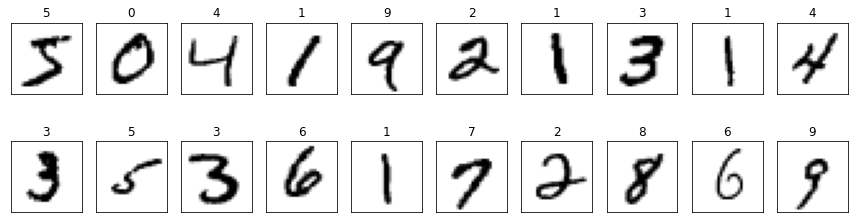

In [100]:
def display_images(images, labels, ncols=10):
    fig = plt.figure(figsize=(15, 4))
    nrows = len(images) / ncols
    if len(images) % ncols != 0:
        nrows += 1
    for i in range(len(images)):
        ax = fig.add_subplot(nrows, ncols, i+1, xticks=[], yticks=[])
        ax.imshow(images[i], cmap=plt.cm.binary)
        ax.set_title(labels[i])
    plt.show()

display_images(train_images[:20], train_labels[:20])

### Preprocess The Data

In [101]:
# some constant
input_size = 28 * 28
num_classes = 10

In [102]:
def preprocess_data(data, size=784):
    reshaped = data.reshape(data.shape[0], size)
    return reshaped.astype('float32') / 255.0

train_images = preprocess_data(train_images)
test_images = preprocess_data(test_images)

In [103]:
def preprocess_labels(data, nclass=10):
    # OneHot Encoder
    return tf.keras.utils.to_categorical(data, nclass)

train_labels = preprocess_labels(train_labels, num_classes)
test_labels = preprocess_labels(test_labels, num_classes)

### Build Model

#### Model 1

In [104]:
# defining the model
model1 = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model1.add(Dense(units=32, activation='sigmoid', input_shape=(28 * 28, )))
model1.add(Dense(units=10, activation='softmax'))
model1.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [105]:
model1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

#### Model 2

In [106]:
# defining the model
model2 = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model2.add(Dense(units=128, activation='relu', input_shape=(28 * 28, )))
model2.add(Dropout(0.2))
model2.add(Dense(units=64, activation='sigmoid'))
model2.add(Dense(units=10, activation='softmax'))
model2.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Can use sgd or adam (which is better)
# Choose model or model2
model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

### Train Data

In [108]:
model = model1 # choose model1 or model2

In [109]:
model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 752us/step - loss: 0.5814 - accuracy: 0.8678
Epoch 2/10
1875/1875 [==============================] - 1s 729us/step - loss: 0.2603 - accuracy: 0.9272
Epoch 3/10
1875/1875 [==============================] - 1s 740us/step - loss: 0.2087 - accuracy: 0.9409
Epoch 4/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.1793 - accuracy: 0.9490
Epoch 5/10
1875/1875 [==============================] - 1s 778us/step - loss: 0.1590 - accuracy: 0.9549
Epoch 6/10
1875/1875 [==============================] - 1s 763us/step - loss: 0.1432 - accuracy: 0.9596
Epoch 7/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.1311 - accuracy: 0.9627
Epoch 8/10
1875/1875 [==============================] - 1s 756us/step - loss: 0.1210 - accuracy: 0.9651
Epoch 9/10
1875/1875 [==============================] - 1s 758us/step - loss: 0.1124 - accuracy: 0.9683
Epoch 10/10
1875/1875 [==============================] - 1s 767u

### Test and Evaluate

In [110]:
# Evaluate accuracy
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1357 - accuracy: 0.9613

Test accuracy: 0.9613000154495239
